In [1]:
#Prepare life satisfaction data

import pandas as pd

lifes_data = pd.read_csv("./datasets/life_satisfaction/BLI_22112021081533575.csv",thousands=',')
lifes_data = lifes_data[lifes_data["INEQUALITY"]=="TOT"]
lifes_data = lifes_data.pivot(index="Country",columns="Indicator",values="Value")

lifes_data.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [2]:
lifes_data["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.1
Belgium      6.9
Brazil       6.4
Canada       7.4
Name: Life satisfaction, dtype: float64

In [3]:
gdp = pd.read_csv("./datasets/gdp/gdp.csv",thousands=',',encoding='ansi')

gdp = gdp[gdp["Units"]=="National currency"]
gdp = gdp[gdp["Subject Descriptor"]=="Gross domestic product, constant prices"]


gdp.rename(columns={"2020": "GDP"},inplace=True)
gdp.set_index("Country", inplace= True)
gdp["GDP"].head()

Country
Afghanistan    1,288.87
Albania          811.13
Algeria        7,157.75
Andorra           2.354
Angola         1,462.56
Name: GDP, dtype: object

In [4]:
full_country_stats = pd.merge(left=lifes_data,right=gdp,left_index=True,right_index=True)
full_country_stats.sort_values(by="GDP", inplace= True)
full_country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,2018,2019,GDP,2021,2022,2023,2024,2025,2026,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Spain,11.0,0.1,59.0,4.01,62.0,82.1,0.6,23999.0,373548.0,21.0,...,"1,169.46","1,193.81","1,064.61","1,125.69","1,197.56","1,228.98","1,253.09","1,272.80","1,292.00",2020.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,"1,189.65","1,206.44","1,157.47","1,218.00","1,236.53","1,261.44","1,287.95","1,315.22","1,343.23",2020.0
Israel,21.0,NaN,87.0,15.45,69.0,69.8,1.8,NaN,NaN,NaN,...,"1,322.39","1,372.30","1,342.75","1,437.55","1,496.08","1,549.43","1,599.80","1,650.78","1,703.69",2020.0
Italy,18.0,0.7,61.0,4.11,58.0,58.4,0.6,26588.0,279889.0,23.0,...,"1,720.79","1,725.73","1,572.64","1,663.39","1,733.81","1,761.84","1,779.79","1,797.61","1,815.06",2020.0
Turkey,20.0,8.0,39.0,32.64,52.0,59.8,1.4,NaN,NaN,20.0,...,"1,756.49","1,772.12","1,803.90","1,965.41","2,030.04","2,097.81","2,166.70","2,238.49","2,312.78",2020.0


In [5]:
full_country_stats[["GDP","Life satisfaction"]].loc["Switzerland"]

GDP                  711.922
Life satisfaction        7.5
Name: Switzerland, dtype: object

<AxesSubplot:xlabel='GDP', ylabel='Life satisfaction'>

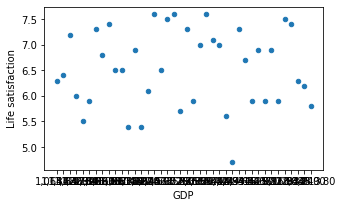

In [7]:
import matplotlib.pyplot as plt
life_gdp = full_country_stats[['GDP','Life satisfaction']]
life_gdp.plot(kind='scatter',x="GDP",y='Life satisfaction', figsize=(5,3))


In [18]:
life_gdp = full_country_stats[['GDP','Life satisfaction']]
life_gdp.sort_values(by="Life satisfaction",ascending=False)

,GDP,Life satisfaction
Country,,
Norway,"3,556.72",7.6
Finland,223.266,7.6
Denmark,"2,090.60",7.6
Switzerland,711.922,7.5
Iceland,"2,571.29",7.5
Canada,"1,990.61",7.4
Netherlands,728.345,7.4
Sweden,"4,983.36",7.3
New Zealand,252.082,7.3
